<a href="https://colab.research.google.com/github/Alan-Bravo-Tec/Data-Mining-Python/blob/main/Copia_de_20261_1910_04_2_ClusterEmpleados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:

df = pd.read_excel('/content/drive/MyDrive/Datos /HR_Employee_Attrition_Dataset.xlsx')

# Eliminar columnas
df=df.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

# Crear lista de columnas dummies
to_get_dummies_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus' ]

# Crear variables dummies
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

# Mapear overtime y attrition
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}


df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

# Separación de la variable objetivo y otras variables

Y= df.Attrition
X= df.drop(columns = ['Attrition'])

# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

# Escalar los datos
sc=StandardScaler()

# Fit_transform en datos train
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transformación en datos test
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [5]:
#Encontrar el numero optimo de clusters k usando la grafica de codo y con el metodo de silhouette

inercia = []
siluete = []
K=range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=42)
    kmeans.fit(X_train_scaled)
    inercia.append(kmeans.inertia_)
    siluete.append(silhouette_score(X_train_scaled, kmeans.labels_))

Text(0.5, 1.0, 'codo')

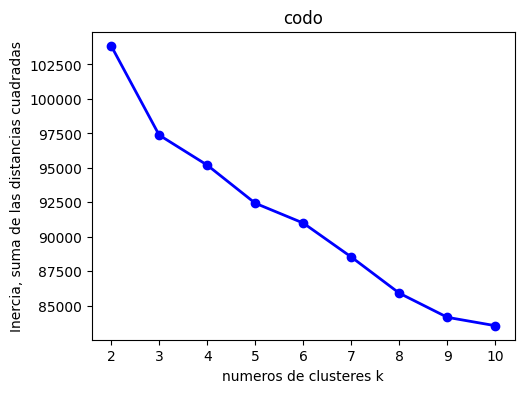

In [6]:
#Graficar metodo de codo
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
plt.plot(K, inercia, 'bo-', linewidth=2)
plt.xlabel('numeros de clusteres k')
plt.ylabel('Inercia, suma de las distancias cuadradas')
plt.title('codo')

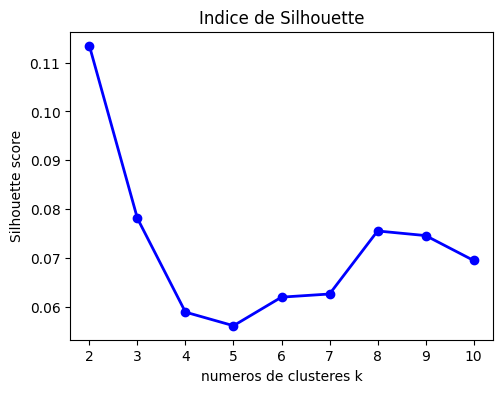

In [7]:
#Encontrar el indice de silhoutte
#El peor numero de clusters en este caso es 5
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 2)
plt.plot(K, siluete, 'bo-', linewidth=2)
plt.xlabel('numeros de clusteres k')
plt.ylabel('Silhouette score')
plt.title('Indice de Silhouette')
plt.show()

In [8]:
#Usar PCA (Principal Component Analysis)
# Sirve para reducir la dimensionalidad de los datos cuando hay muchas variables

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

#Crear modelos Kmeans con los PCA
k2= KMeans(n_clusters = 2, random_state = 42, n_init = 'auto')
k3= KMeans(n_clusters = 3, random_state = 42, n_init = 'auto')
k8= KMeans(n_clusters = 8, random_state = 42, n_init = 'auto')
k2.fit(X_pca)
k3.fit(X_pca)
k8.fit(X_pca)

labels_k2 = k2.fit_predict(X_pca)
labels_k3 = k3.fit_predict(X_pca)
labels_k8 = k8.fit_predict(X_pca)

Text(0.5, 0, 'PC2')

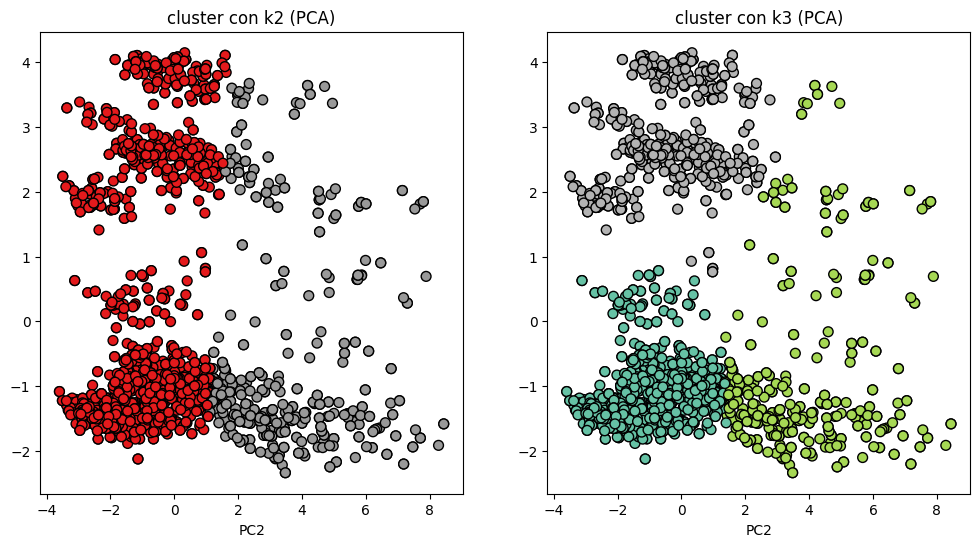

In [9]:
#graficar modelos
fig, axes = plt.subplots(1,2, figsize = (12,6))

#grafico para k2
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=labels_k2, cmap='Set1', s=50, marker='o', edgecolor = 'k')
axes[0].set_title('cluster con k2 (PCA)')
axes[0].set_xlabel('PC1')
axes[0].set_xlabel('PC2')
#graficar modelos



#grafico para k8
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=labels_k3, cmap='Set2', s=50, marker='o', edgecolor = 'k')
axes[1].set_title('cluster con k3 (PCA)')
axes[1].set_xlabel('PC1')
axes[1].set_xlabel('PC2')

In [10]:
k_optimo = 2
KMeans_optimo = KMeans(n_clusters = k_optimo, random_state = 42, n_init = 'auto')
clusters = KMeans_optimo.fit(X_train_scaled)
clusters

KMeans(n_clusters=2, random_state=42)

In [11]:
#Agregar la columna de cluster al dataset original
X_clustered = X_train.copy()
X_clustered['cluster'] = clusters.labels_
X_clustered['Attrition'] = y_train
X_clustered.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,cluster,Attrition
1189,33,392,2,93,4,5505,3921,1,0,14,...,False,False,False,False,True,False,False,False,0,0
598,28,890,2,46,3,4382,16374,6,0,17,...,False,False,False,True,False,False,False,True,0,1
859,29,942,15,69,4,2168,26933,0,1,18,...,False,False,False,True,False,False,True,False,0,0
1123,35,670,10,51,3,6142,4223,3,1,16,...,False,False,False,False,False,False,False,True,0,0
1229,40,369,8,92,1,6516,5041,2,1,16,...,False,True,False,False,False,False,True,False,0,0


In [12]:
# Variables importantes por modelo
variables_regresion = [
    'OverTime',
    'BusinessTravel_Travel_Frequently',
    'MaritalStatus_Single',
    'YearsSinceLastPromotion',
    'YearsAtCompany'
]

variables_arbol = [
    'OverTime',
    'MonthlyIncome',
    'TotalWorkingYears',
    'Age',
    'NumCompaniesWorked'
]

variables_random_forest = [
    'MonthlyIncome',
    'OverTime',
    'Age',
    'TotalWorkingYears',
    'HourlyRate'
]

# Diccionario de variables por modelo
modelo_variables = {
    "Regresión Logística": variables_regresion,
    "Árbol de Decisión": variables_arbol,
    "Random Forest": variables_random_forest
}

variables = ['cluster', 'Attrition']

In [13]:
X_clustered [variables + variables_arbol]

,cluster,Attrition,OverTime,MonthlyIncome,TotalWorkingYears,Age,NumCompaniesWorked
1189,0,0,0,5505,6,33,1
598,0,1,0,4382,5,28,6
859,0,0,1,2168,6,29,0
1123,0,0,1,6142,10,35,3
1229,0,0,1,6516,18,40,2
...,...,...,...,...,...,...,...
2219,1,1,0,19845,33,52,1
2192,0,0,0,2684,3,38,0
907,1,0,0,18213,26,44,7
2114,0,0,1,2356,8,31,3


In [14]:
X_clustered [variables + variables_random_forest]

,cluster,Attrition,MonthlyIncome,OverTime,Age,TotalWorkingYears,HourlyRate
1189,0,0,5505,0,33,6,93
598,0,1,4382,0,28,5,46
859,0,0,2168,1,29,6,69
1123,0,0,6142,1,35,10,51
1229,0,0,6516,1,40,18,92
...,...,...,...,...,...,...,...
2219,1,1,19845,0,52,33,57
2192,0,0,2684,0,38,3,66
907,1,0,18213,0,44,26,88
2114,0,0,2356,1,31,8,48


In [15]:
X_clustered.groupby('cluster').count()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition
cluster,,,,,,,,,,,,,,,,,,,,,
0,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550,...,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550
1,508,508,508,508,508,508,508,508,508,508,...,508,508,508,508,508,508,508,508,508,508


In [16]:
X_clustered.groupby('Attrition').count()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,cluster
Attrition,,,,,,,,,,,,,,,,,,,,,
0,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,...,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726
1,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332


In [17]:
#Crear rangos de ingreso mensual

# Crear rangos
bins = [0, 6000, 10000, 12000, 15000, 20000]
labels = ['<6K', '6K-10K', '10K-12K', '12K-15K', '15K-20K']
X_clustered['IncomeRange'] = pd.cut(X_clustered['MonthlyIncome'], bins=bins, labels=labels, include_lowest = True)
X_clustered[['IncomeRange', 'MonthlyIncome']]


,IncomeRange,MonthlyIncome
1189,<6K,5505
598,<6K,4382
859,<6K,2168
1123,6K-10K,6142
1229,6K-10K,6516
...,...,...
2219,15K-20K,19845
2192,<6K,2684
907,15K-20K,18213
2114,<6K,2356


In [18]:
conteo = X_clustered.groupby(['cluster', 'Attrition', 'IncomeRange'], observed = False).size().unstack(fill_value=0)
conteo

IncomeRange         <6K  6K-10K  10K-12K  12K-15K  15K-20K
cluster Attrition                                         
0       0          1001     260        6        0        0
        1           247      35        1        0        0
1       0            23      93       86       80      177
        1             4      13       17        9        6

In [19]:
# Crear rangos de ingreso mensual

# Crear rangos
bins = [0, 6000, 10000, 12000, 15000, 20000]
labels = ['<6K', '6K-10K', '10K-12K', '12K-15K', '15K-20K']
X_clustered['IncomeRange'] = pd.cut(X_clustered['MonthlyIncome'], bins=bins, labels=labels, include_lowest = True)
X_clustered[['IncomeRange', 'MonthlyIncome']]

,IncomeRange,MonthlyIncome
1189,<6K,5505
598,<6K,4382
859,<6K,2168
1123,6K-10K,6142
1229,6K-10K,6516
...,...,...
2219,15K-20K,19845
2192,<6K,2684
907,15K-20K,18213
2114,<6K,2356


/tmp/ipython-input-4247295386.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = tabla.pivot_table(index='IncomeRange',columns=['cluster', 'Attrition'], values = 'Cantidad')


<Axes: xlabel='IncomeRange'>

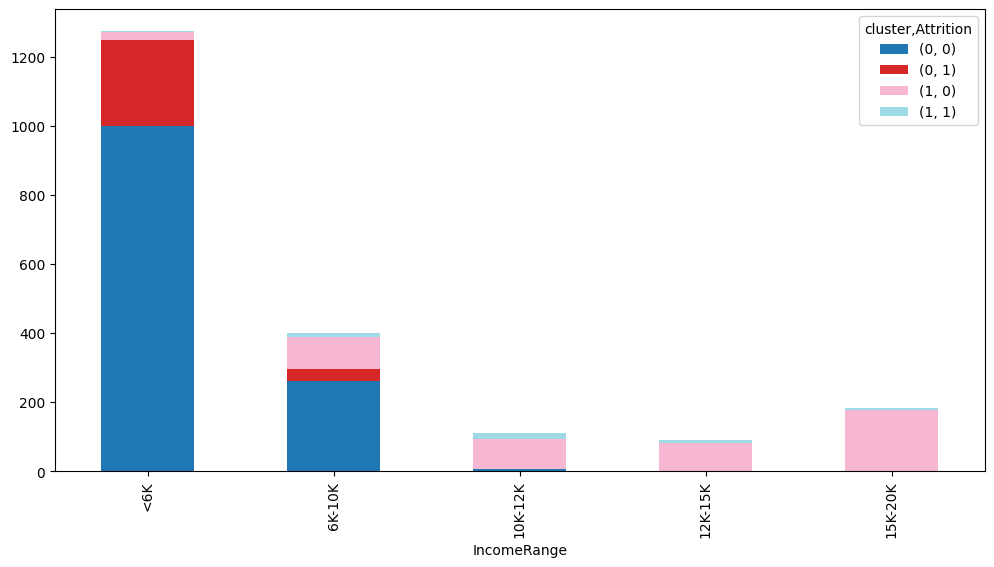

In [20]:
tabla = X_clustered.groupby(['cluster', 'Attrition', 'IncomeRange'], observed = False).size().reset_index(name='Cantidad')

pivot = tabla.pivot_table(index='IncomeRange',columns=['cluster', 'Attrition'], values = 'Cantidad')

pivot.plot(kind='bar', stacked = True, figsize=(12,6), colormap='tab20')


📊 Modelo: Regresión Logística


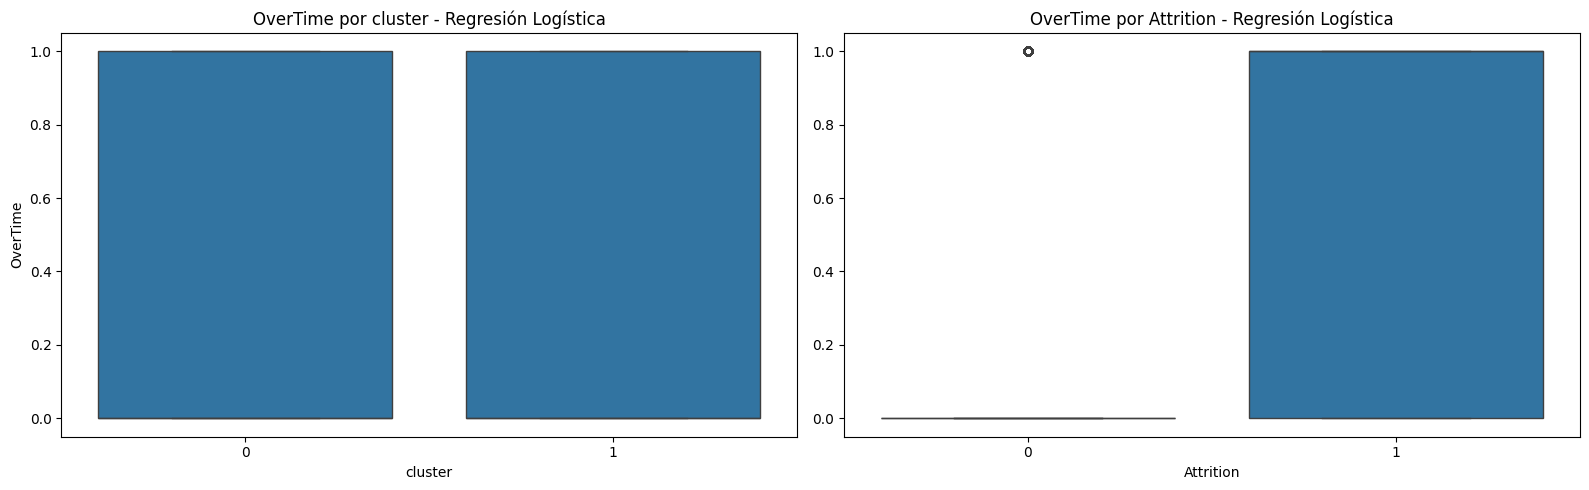

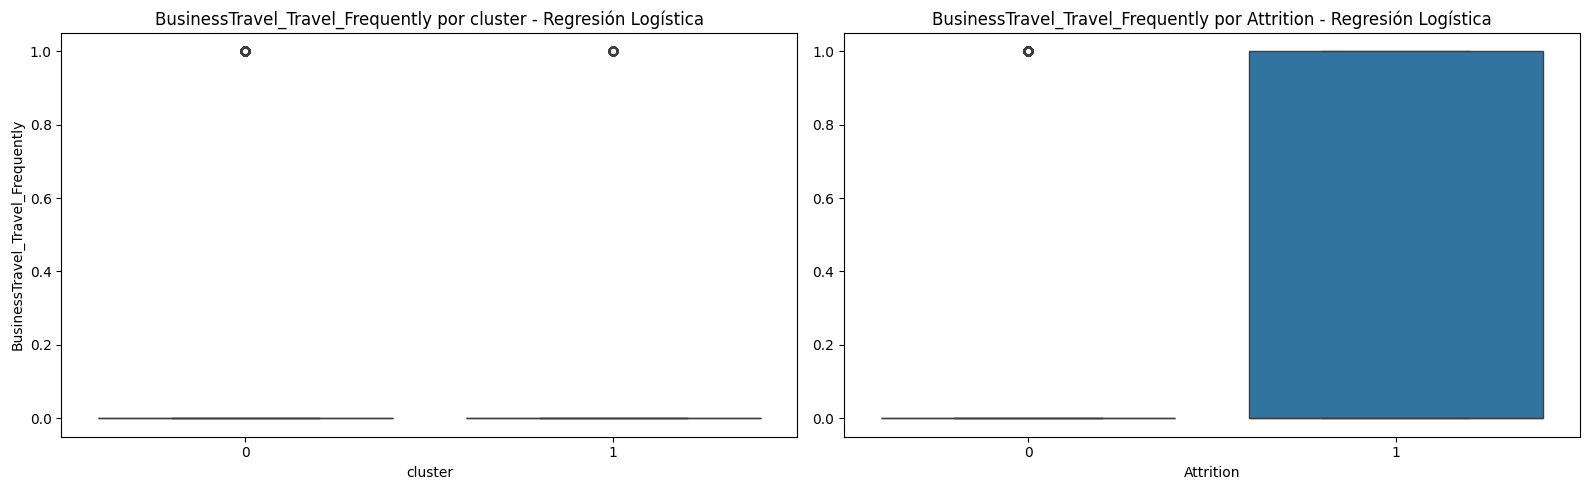

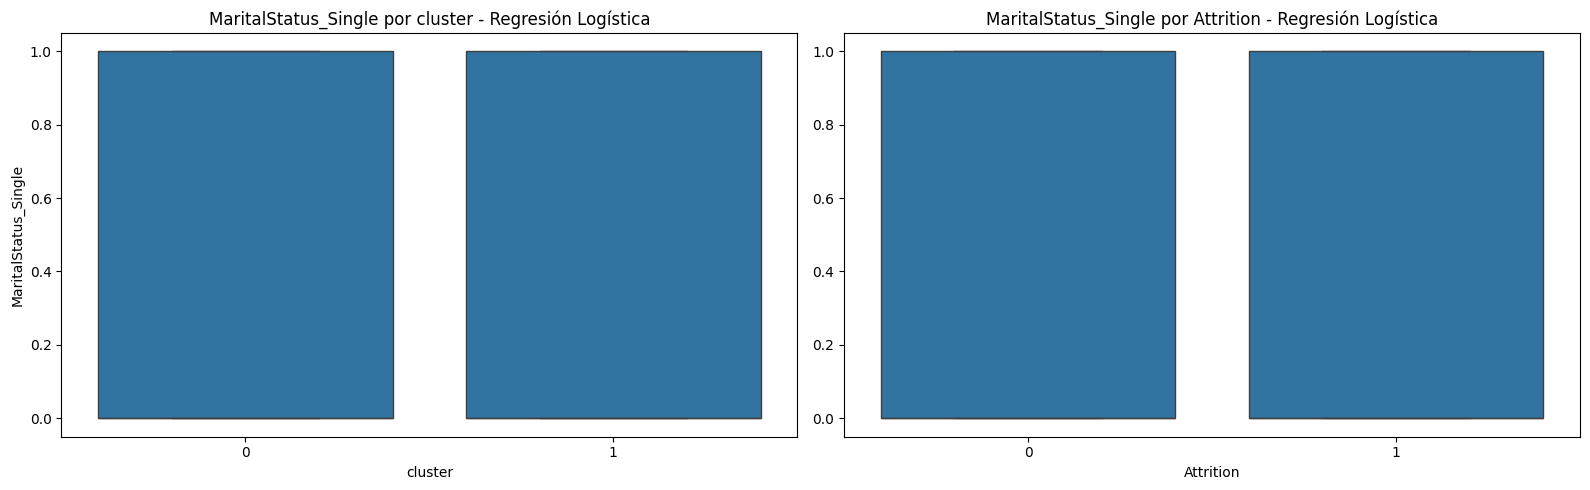

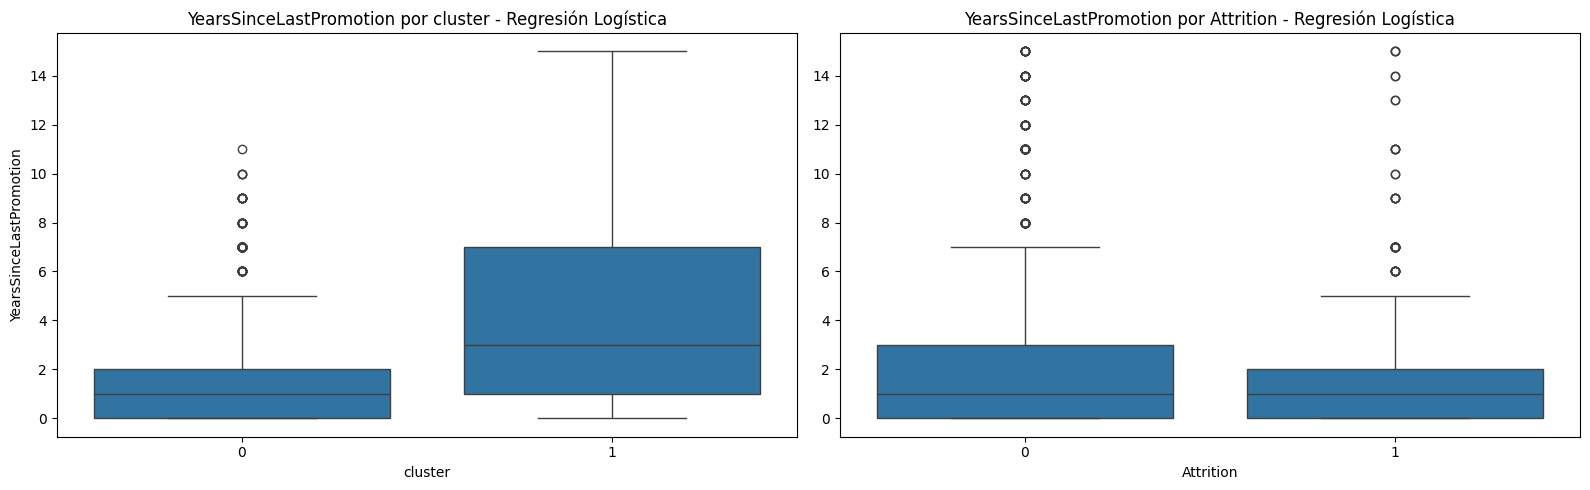

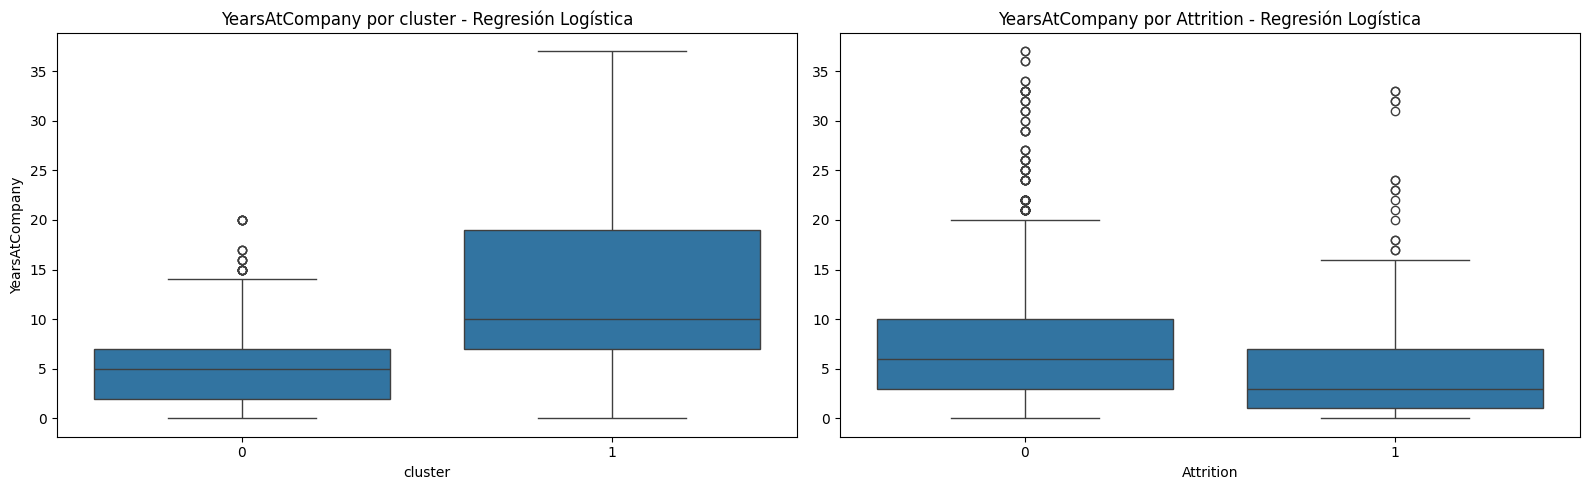


📊 Modelo: Árbol de Decisión


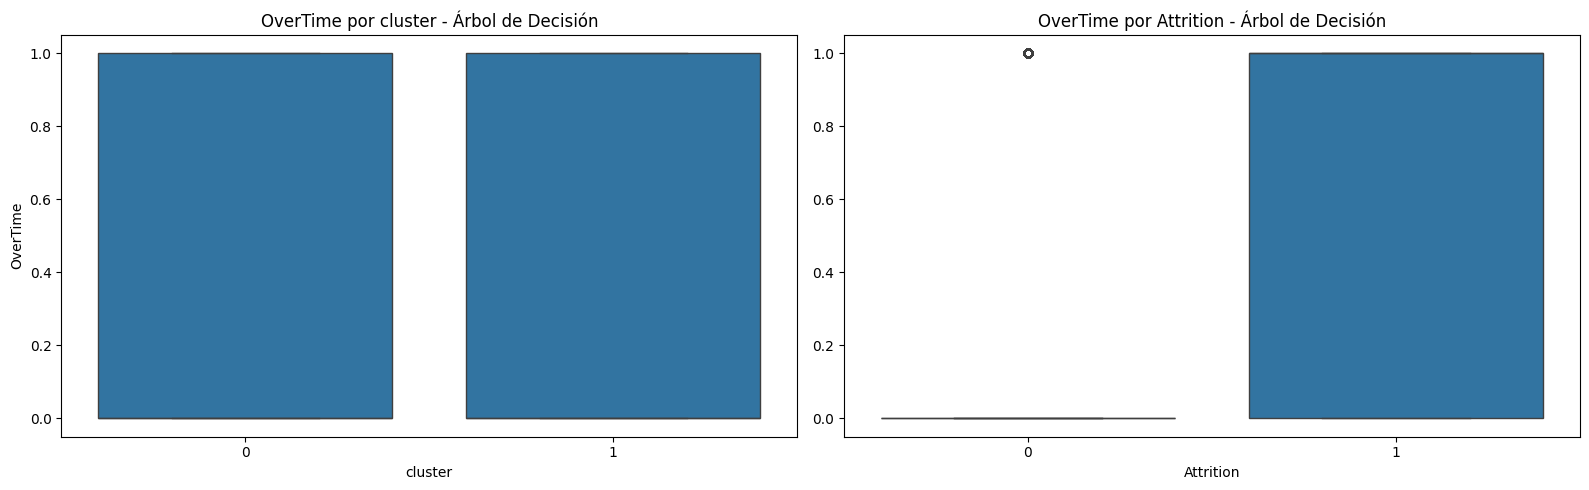

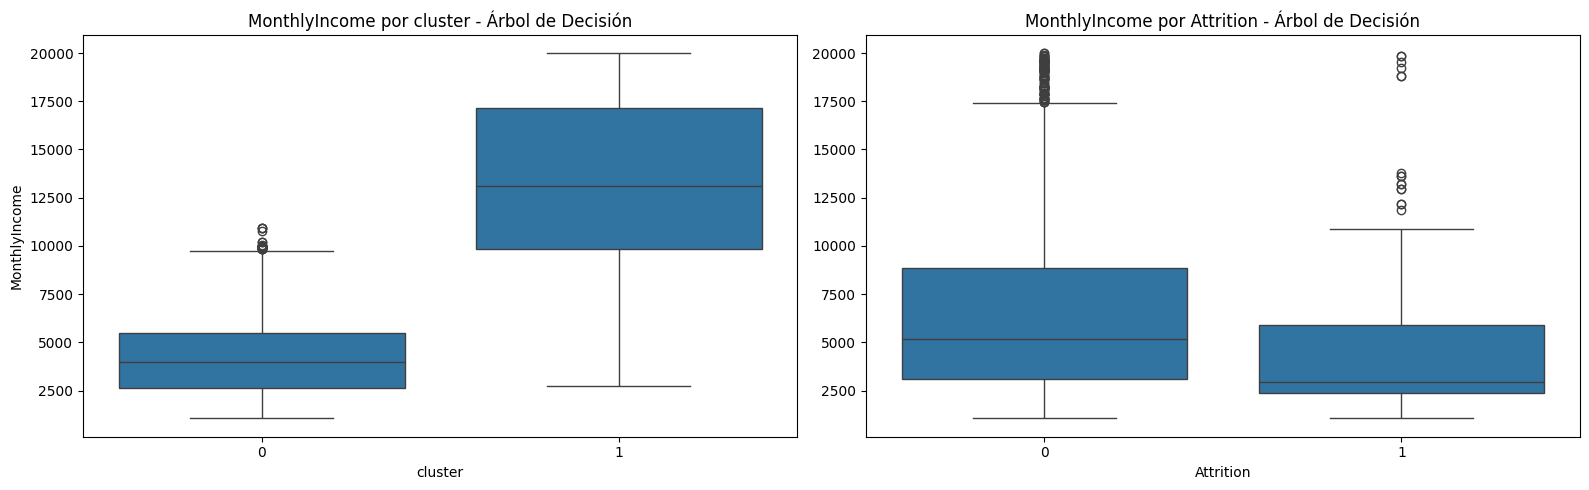

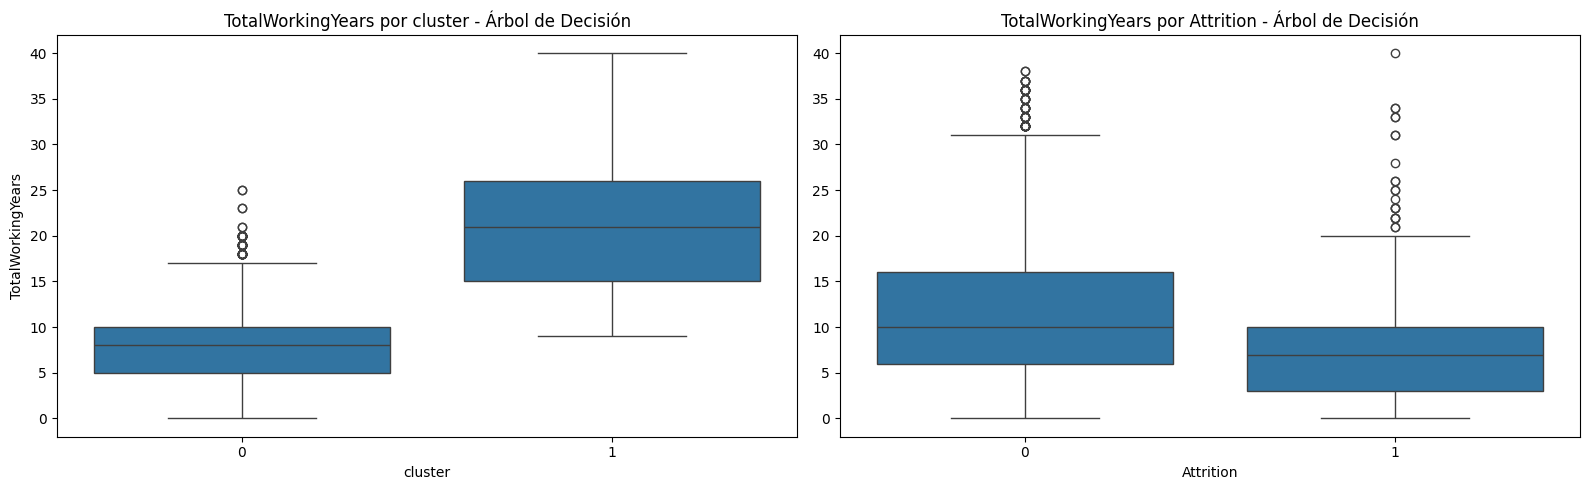

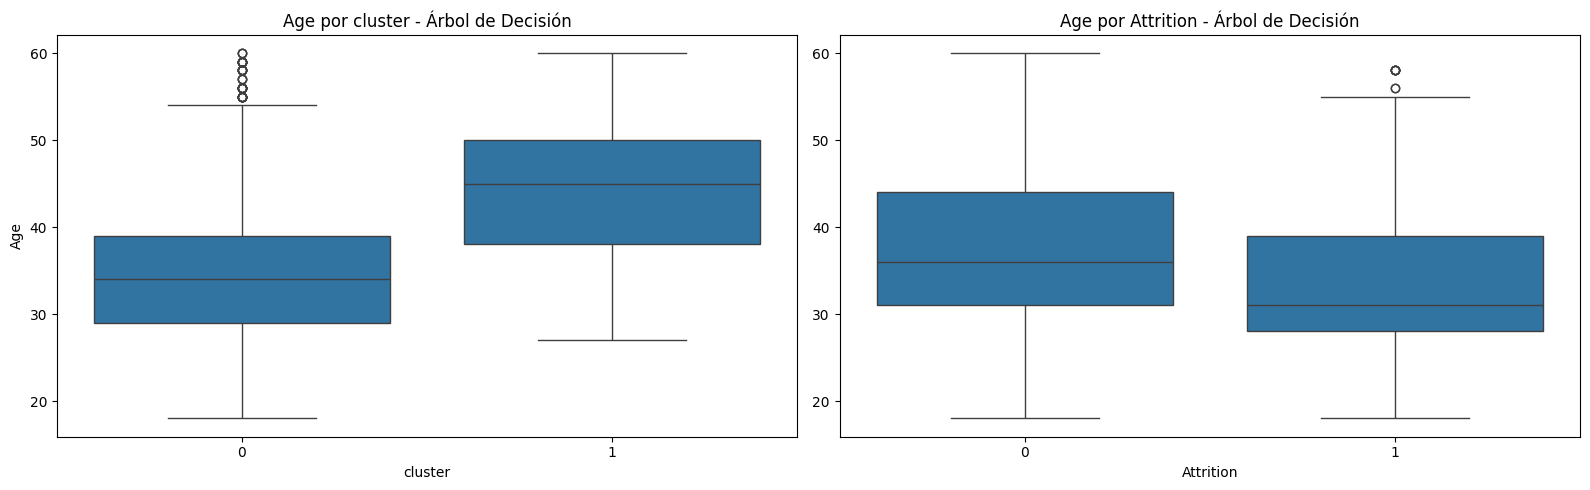

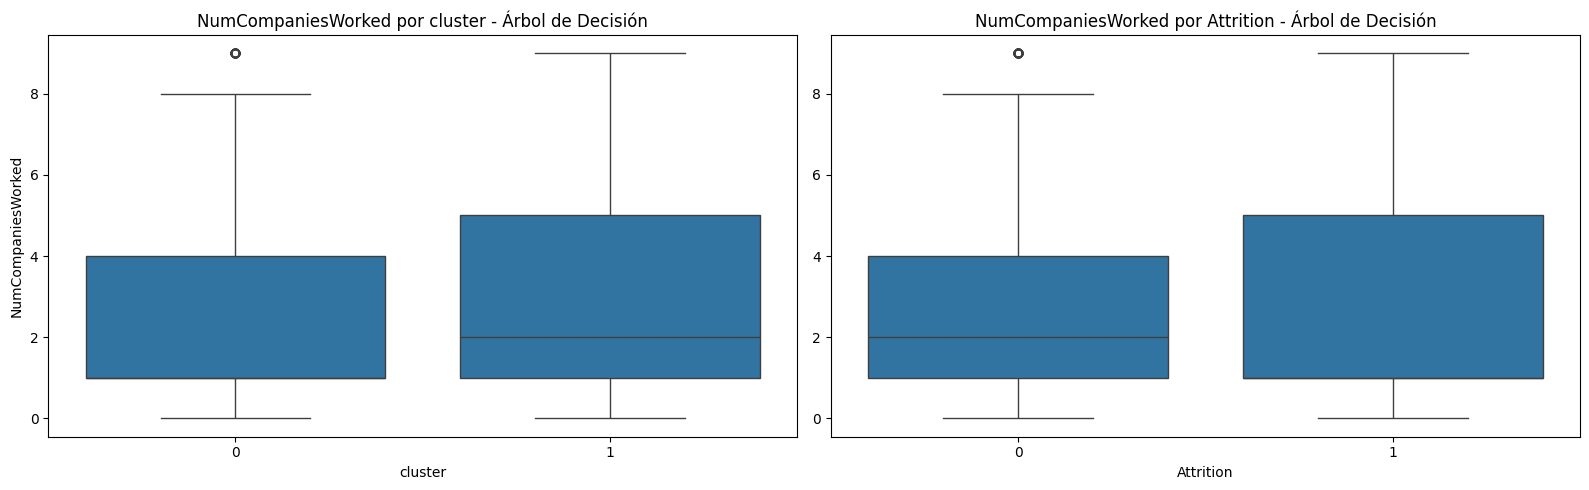


📊 Modelo: Random Forest


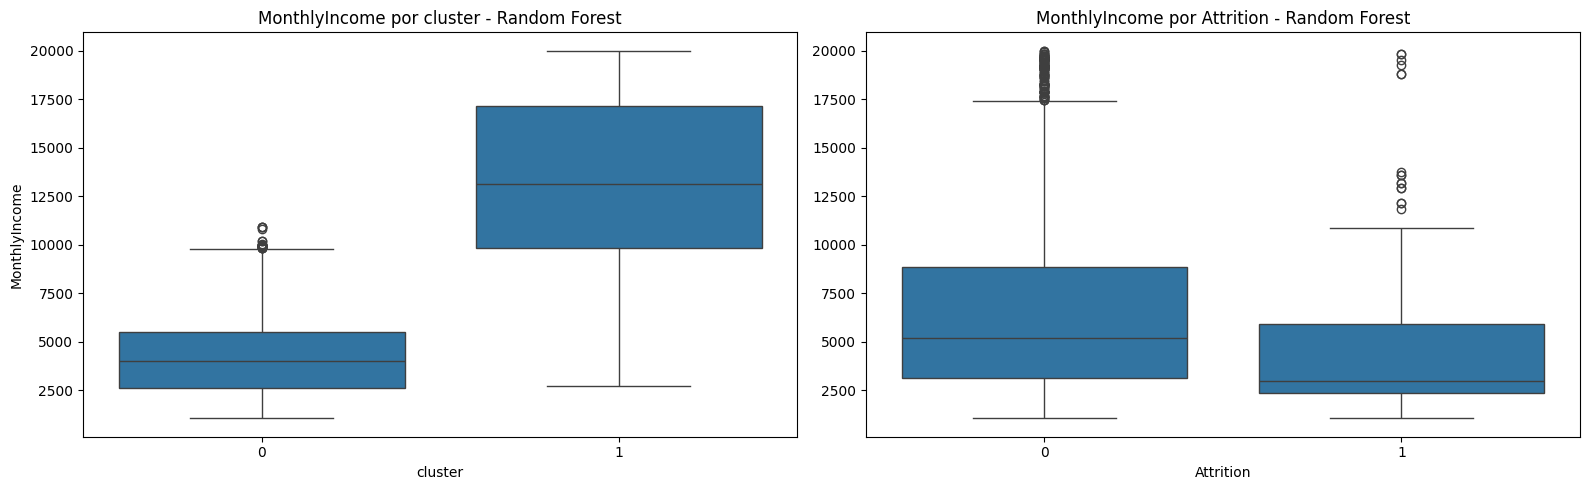

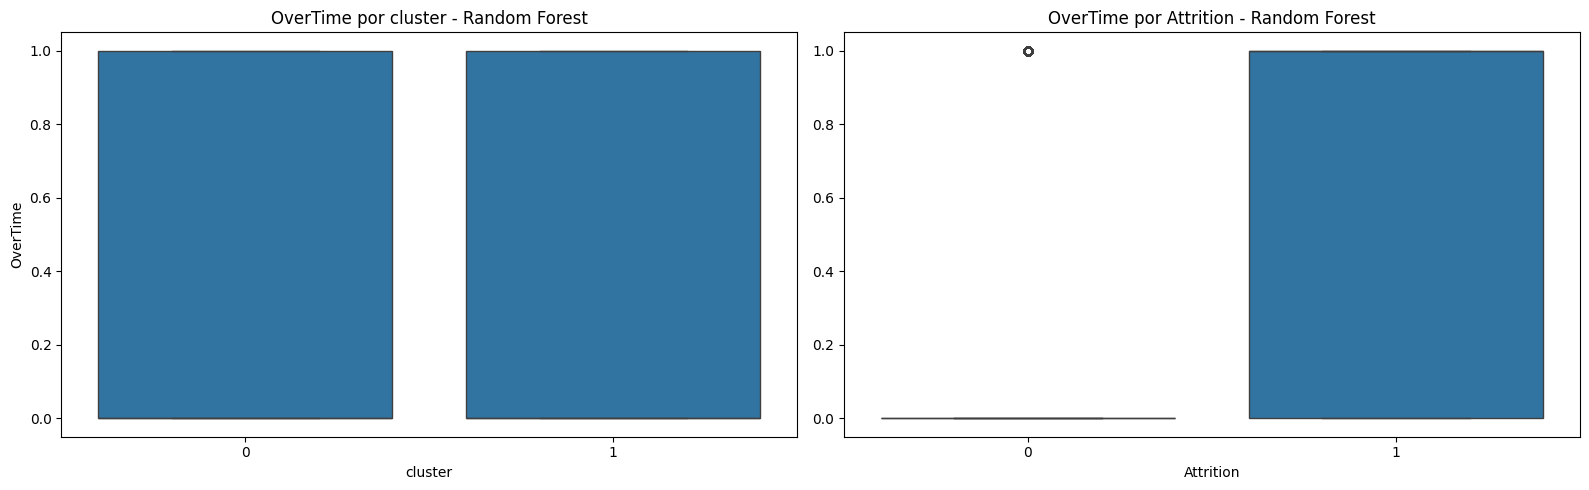

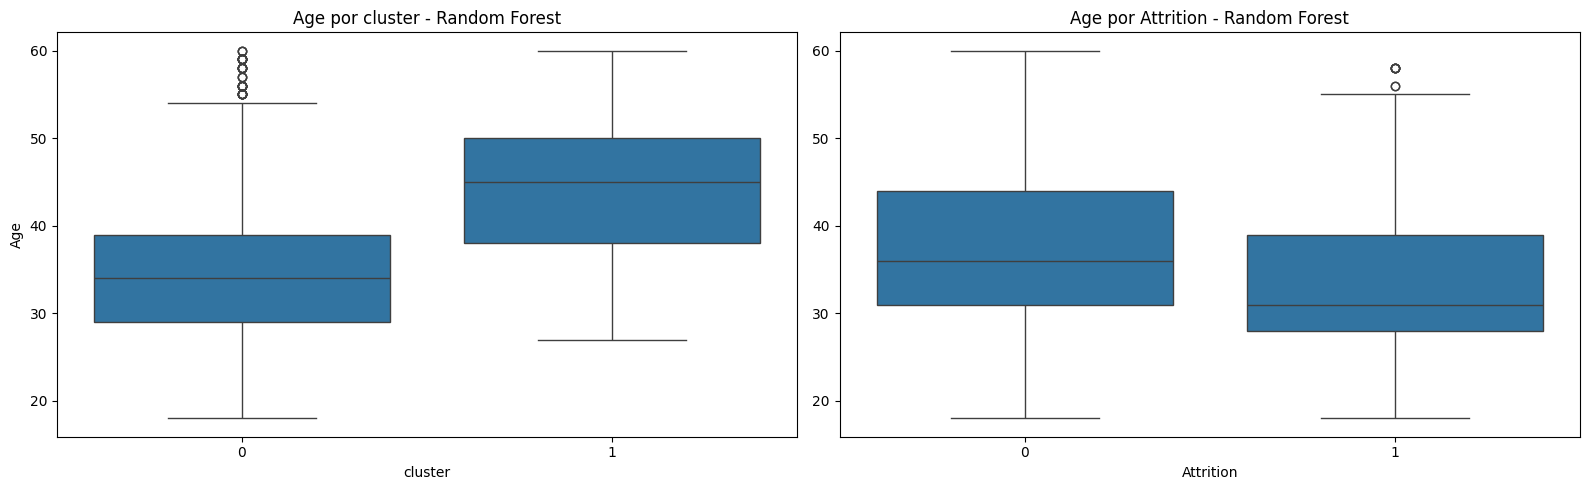

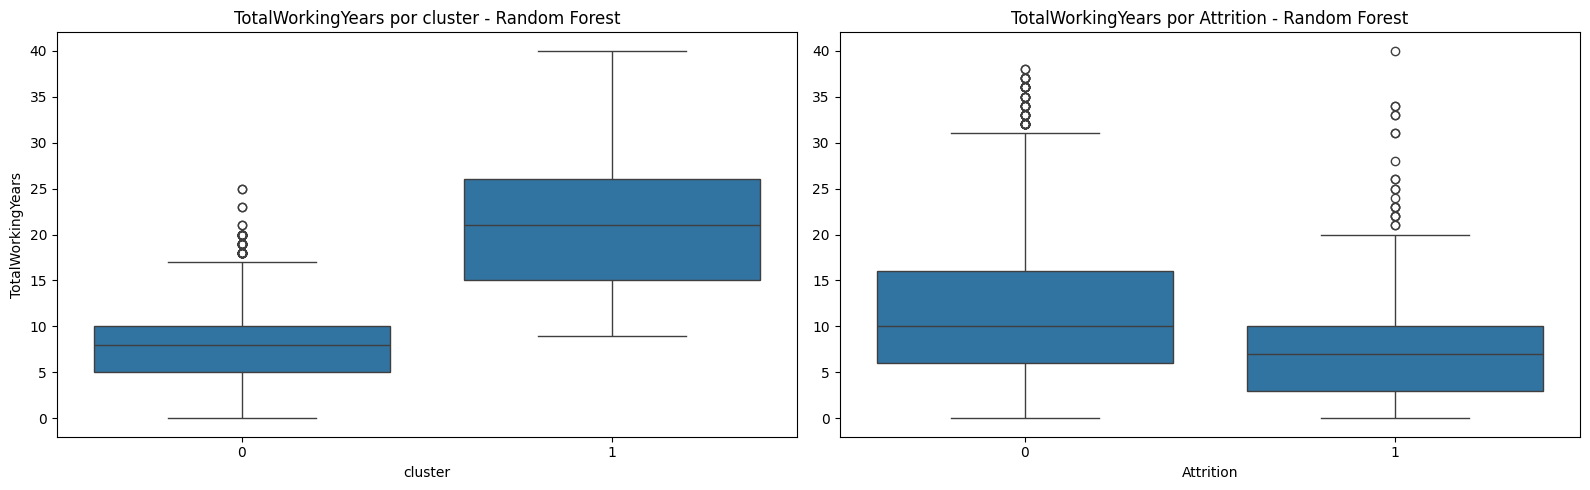

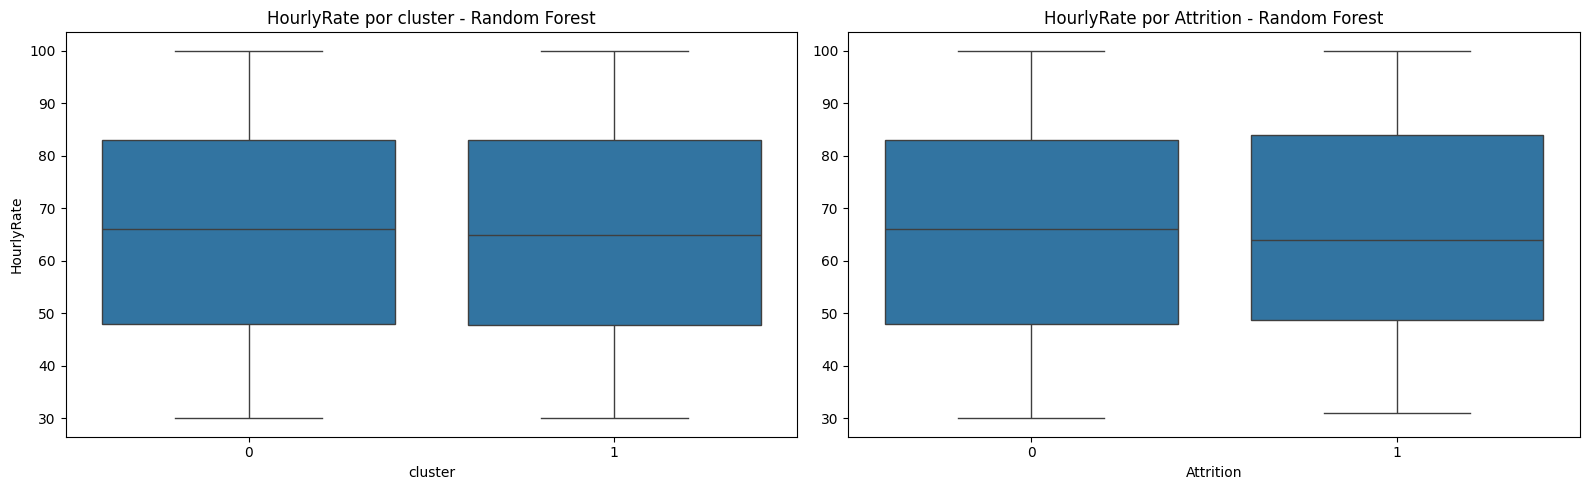

In [21]:
#Graficos boxplot varias vs cluster y attrition

# Generar gráficos combinados por variable
for modelo, variables in modelo_variables.items():
    print(f"\n📊 Modelo: {modelo}")
    for var in variables:
        if var in X_clustered.columns:
            # Convertir booleanos a enteros temporalmente para graficar
            if X_clustered[var].dtype == bool:
                X_clustered[var] = X_clustered[var].astype(int)

            fig, axes = plt.subplots(1, 2, figsize=(16, 5))

            for i, cat in enumerate(['cluster', 'Attrition']):
                sns.boxplot(data=X_clustered, x=cat, y=var, ax=axes[i])
                axes[i].set_title(f'{var} por {cat} - {modelo}')
                axes[i].set_xlabel(cat)
                axes[i].set_ylabel(var if i == 0 else '')

            plt.tight_layout()
            plt.show()
        else:
            print(f"La variable '{var}' no se encuentra en X_clustered")


In [22]:
#Comparar cluster vs la etiqueta real
X_clustered.groupby(['cluster','Attrition']).size().unstack(fill_value=0)
pd.crosstab(X_clustered['cluster'], X_clustered['Attrition'], margins=True)

Attrition,0,1,All
cluster,,,
0,1267,283,1550
1,459,49,508
All,1726,332,2058


In [23]:
centroids_df= pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids_df

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,-0.372871,0.011338,0.003864,0.101688,-0.027565,-0.727814,-0.081853,-0.076147,-0.115908,-0.009745,...,-0.189030,2.148038,-0.275313,-0.325357,-0.235339,-0.502580,-0.536526,-0.247733,-0.065452,0.089084
1,0.511098,0.152176,0.138013,-0.037712,-0.151089,0.724824,0.122774,0.270551,0.099080,0.098511,...,0.063302,-0.427440,0.238838,1.105761,-0.235339,-0.469786,-0.536526,-0.247733,-0.082330,0.062931
2,-0.353602,-0.027934,-0.109287,0.083106,0.052468,-0.747863,-0.021791,-0.063759,0.110593,0.072942,...,0.540646,-0.461999,-0.275313,-0.325357,-0.235339,1.657827,-0.536526,-0.247733,-0.062392,0.050976
3,0.685395,-0.229468,0.042504,-0.213306,-0.154392,0.686482,0.128577,0.011802,-0.038997,-0.080194,...,-0.189030,-0.140982,-0.275313,0.090065,-0.235339,-0.447195,0.770342,-0.247733,0.187452,-0.051838
4,0.024300,-0.054426,0.086602,0.035464,0.024014,0.056891,-0.021791,-0.077839,0.117707,-0.141271,...,-0.189030,-0.461999,-0.275313,-0.325357,-0.235339,-0.502580,1.863844,-0.247733,0.039772,-0.025277
5,-0.187381,0.125879,-0.010587,0.007993,0.088596,-0.002920,0.055166,0.008159,0.021330,0.012198,...,-0.189030,-0.461999,-0.275313,-0.325357,-0.235339,-0.502580,1.863844,-0.247733,-0.034502,0.055750
6,-0.755408,0.008842,-0.003494,-0.146682,-0.048939,-0.819159,0.042337,-0.459498,0.003232,0.090433,...,-0.189030,-0.461999,-0.275313,-0.325357,-0.235339,-0.502580,-0.536526,4.036597,-0.084104,0.340023
7,0.054939,-0.013429,0.157472,-0.084061,0.041699,-0.204046,-0.075160,0.018977,-0.098393,0.000964,...,-0.035407,-0.200167,-0.275313,0.966439,-0.235339,-0.091077,-0.536526,-0.247733,0.079145,-0.191135
8,0.852096,0.020821,-0.162203,-0.074608,-0.095830,2.041718,0.109470,0.533255,-0.014363,-0.138428,...,-0.189030,-0.461999,-0.275313,-0.325357,4.249183,-0.502580,-0.536526,-0.247733,0.113164,-0.195614
9,1.181740,-0.122836,-0.202378,0.022557,0.008644,2.422623,0.017953,0.082857,-0.098117,-0.083447,...,-0.189030,-0.461999,3.632231,-0.325357,-0.235339,-0.502580,-0.536526,-0.247733,0.132182,-0.174526


In [25]:
X_clustered['PCA1'] = X_pca[:, 0]
X_clustered['PCA2'] = X_pca[:, 1]
X_clustered[['PCA1','PCA2', 'Attrition','cluster']]

,PCA1,PCA2,Attrition,cluster
1189,-0.917313,2.477530,0,0
598,-1.992864,-1.541318,1,0
859,-1.652979,-1.267999,0,0
1123,-0.969078,-0.504726,0,0
1229,-0.921333,-0.808871,0,0
...,...,...,...,...
2219,7.804802,1.848078,1,1
2192,-2.084770,-1.584070,0,0
907,6.008495,1.814051,0,1
2114,-1.459410,-1.386550,0,0


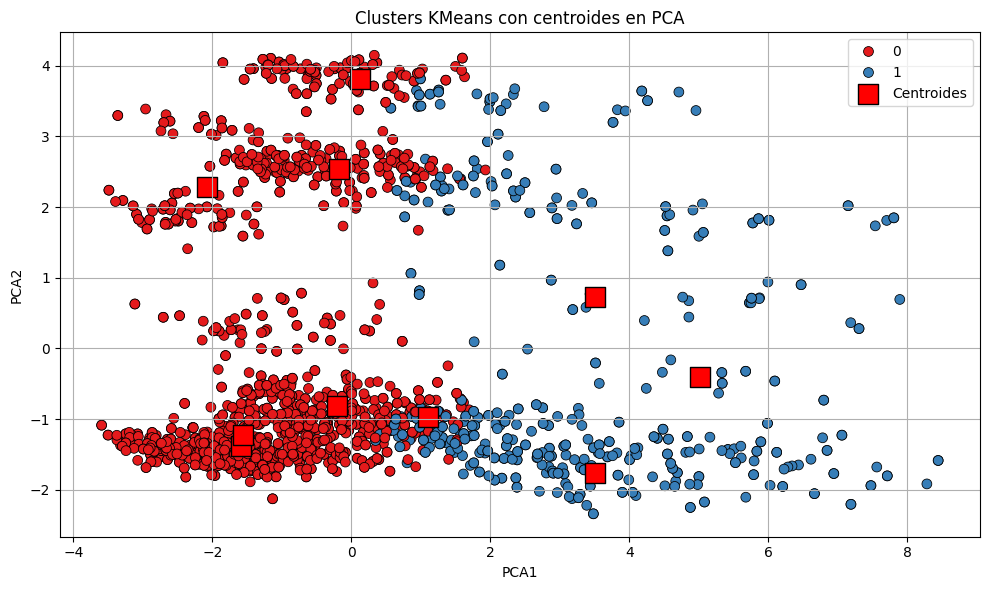

In [26]:
#Grafica Final Kmeans
# Usamos directamente PCA1 y PCA2
plt.figure(figsize=(10, 6))

# Graficar puntos por cluster
sns.scatterplot(data=X_clustered, x='PCA1', y='PCA2', hue='cluster', palette='Set1',
                s=50, edgecolor='k')

# Si ya aplicaste PCA antes y tienes el objeto `pca`, proyecta los centroides:
centroids_pca = pca.transform(centroids_df)

# Graficar centroides en rojo y con cuadro
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red', marker='s', s=200, edgecolor='k', label='Centroides')

plt.title('Clusters KMeans con centroides en PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()